Decision Tree 예측 정확도 : 0.8571


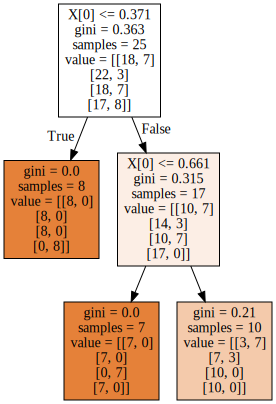

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_dropfinal_withoutSMILES_appendclass_dropunmane.csv')

#데이터 분류
dataset = df.values
X = dataset[:,0:3336].astype(float)
Y = dataset[:,3337]

#X 정규화

scaler = MinMaxScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

#원-핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)

#데이터셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=10)

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(max_depth=8,min_samples_split=16,random_state=10)

#DecisionTreeClasifer 학습
dt_clf.fit(X_train, Y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성

export_graphviz(dt_clf,out_file="tree.dot", feature_names=None, class_names=Y_encoded, impurity=True, filled=True)

#위에서 생성한 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    

#최대 정확도 0.8571 표준화, 정규화해도 동일

Decision Tree 최적 하이퍼 파라미터 : {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree 최고 정확도 : 0.8333
Decision Tree 예측 정확도 : 0.8571


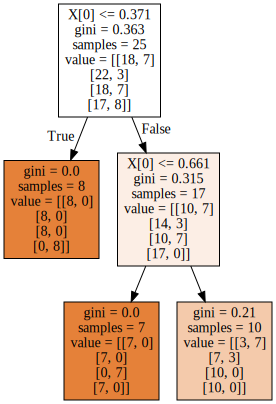

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.python.keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

#데이터 입력
df = pd.read_csv('./VRK2_inhibitor_descriptor_dropfinal_withoutSMILES_appendclass_dropunmane.csv')

#데이터 분류
dataset = df.values
X = dataset[:,0:3336]#.astype(float)
Y = dataset[:,3337]

#X 표준화

scaler = MinMaxScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

#원-핫 인코딩
Y_encoded = tf.keras.utils.to_categorical(Y)

#데이터셋 분리
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=10)

#DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=10)

#파라미터 튜닝
parameters = {'max_depth':[1,2,3,5,8,10], 'min_samples_split':[2,3,5,8,10,12,15,16,18,20], 'min_samples_leaf':[1,2,3,4,5]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=10)
grid_dclf.fit(X_train, Y_train)

print('Decision Tree 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('Decision Tree 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#DecisionTreeClasifer 학습

best_dclf.fit(X_train, Y_train)
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(Y_test, pred)

print('Decision Tree 예측 정확도 : {0:.4f}'.format(accuracy))

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성

export_graphviz(best_dclf,out_file="tree.dot", feature_names=None, class_names=Y_encoded, impurity=True, filled=True)

#위에서 생성한 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)    